In [15]:
1+1

2

In [16]:
include("gravlens.jl")

thin_tiso (generic function with 2 methods)

In [17]:
ax, ay, au, adu, aia, aoa, ada =
    harmonic(1.0, 200.0, pi/58, 0.0000001, 10000);
dx, dy, du, ddu, dia, doa, dda =
    numeric_tiso(1.0, 200.0, π/58, R200(1.0, 200.0), 0.0000001, 10000);
tx, ty, tu, tdu, tia, toa, tda =
    thin_tiso(1.0, 200.0, π/58, R200(1.0, 200.0), 0.0000001, 10000);

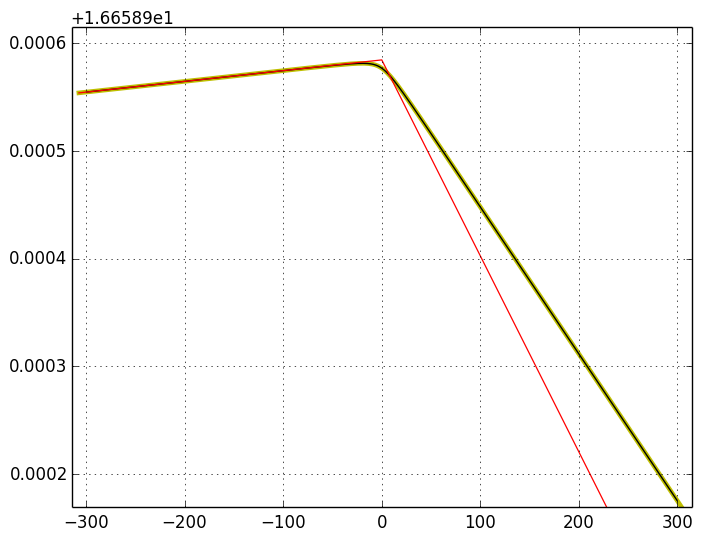

In [18]:
ixs = find((ax.>-300).*(ax.<300))
ax=ax[ixs]
ay=ay[ixs]
plot(dx, dy, "-y", lw=3.3)
hold(true)
plot(ax, ay, "-k")
plot(tx, ty, "-r", lw=0.9)
x0 = cos(pi/6)*R200(1.0,200)
y0 = sin(pi/6)*R200(1.0,200)
plot([-x0, x0], [y0, y0+0.000001*2x0],"--k")
xlim(minimum(ax)*1.05, maximum(ax)*1.05)
ylim(minimum(ay)*0.9999996, maximum(ay)*1.000002)
grid(true)

In [19]:
R200(0.1,200)

205.0541691602129

In [20]:
dx, dy, du, ddu, dia, doa, dda =
    numeric_tiso(0.1, 200.0, 0.0, 3.3e6, 4/3.3e6, 10000);
tx, ty, tu, tdu, tia, toa, tda =
    thin_tiso(0.1, 200.0, 0.0, 3.3e6, 4/3.3e6, 10000);
ex, ey, eu, edu, eia, eoa, eda =
numeric_tiso_el(0.1, 200.0, 0.0, 3.3e6, 4/3.3e6, 10000);
eex, eey, eeu, eedu, eeia, eeoa, eeda =
numeric_tiso_el(0.1, 200.0, 0.0, 3.3e6, 4/3.3e6, 10000; abstol=1.0e-16, reltol=1.0e-17);

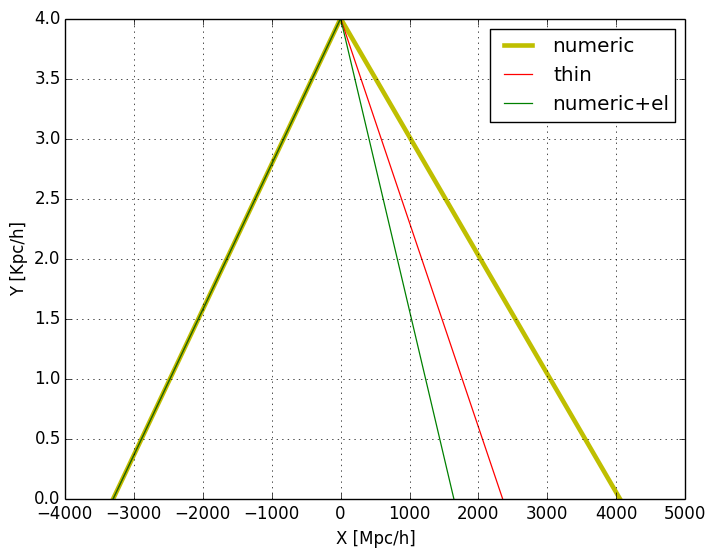

PyObject <matplotlib.text.Text object at 0x323654790>

In [21]:
plot(dx/1e3, dy, "-y",lw=3.3)
hold(true)
plot(tx/1e3, ty, "-r",lw=0.9)
plot(ex/1e3, ey, "-g",lw=0.9)
#plot(eex/1e3, eey, "--k",lw=0.9)
legend(["numeric","thin","numeric+el"], loc=1)
grid(true)
xlabel("X [Mpc/h]")
ylabel("Y [Kpc/h]")

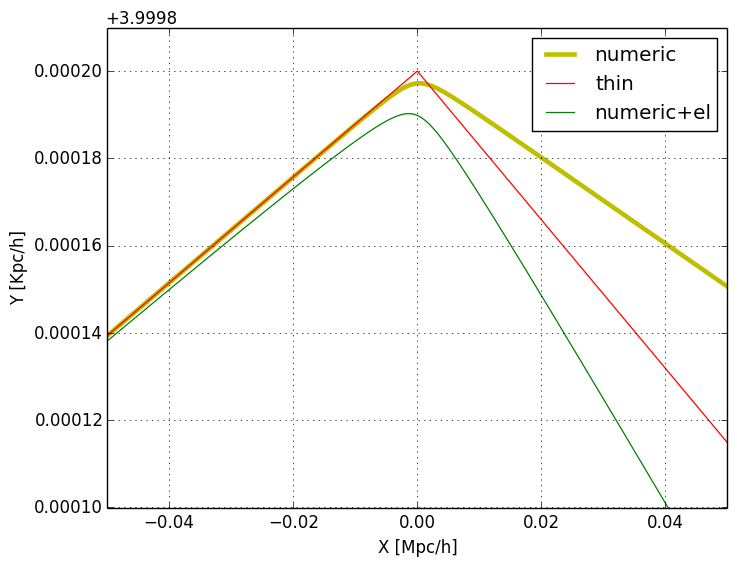

(3.9999,4.00001)

In [22]:
plot(dx/1e3, dy, "-y",lw=3.3)
hold(true)
plot(tx/1e3, ty, "-r",lw=0.9)
plot(ex/1e3, ey, "-g",lw=0.9)
#plot(eex/1e3, eey, "--k",lw=0.9)
legend(["numeric","thin","numeric+el"], loc=1)
grid(true)
xlabel("X [Mpc/h]")
ylabel("Y [Kpc/h]")
xlim(-0.05,0.05)
ylim(3.9999,4.00001)